# Plot example: trimer versus RO curve

In [1]:
from abm import *
import numpy as np
import pandas as pd
from plotnine import *

# Setup

## Simulate simple bispecific model

In [2]:
# Set up single doses
doses_nM = [0.01, 0.1, 1, 10, 100, 1000]
Tdos = pd.DataFrame(
    {'dose_nM':amt, 'route':'d_nM', 'amounts':amt, 'times':0, 'amount_unit':'nM', 'time_unit':'d'} for amt in doses_nM
)
Tsim = Tdos[['dose_nM']]

In [3]:
Tdr = simulate(
    models = "trimer_vs_ro_model.txt",
    simulations = Tsim,
    doses = Tdos,
    parameters = "trimer_vs_ro_parameter_table.csv",
    times = linspace(0, 1.0, 100, 'd'),
    outputs = ['trimer_nM', 'RO_tr_percent', 'er_nmol', 'tr_nmol', 'V_L'],
    scans = fold_scan(er_rpc = [0.2, 0.5, 1., 2., 5.])
).to_pandas()

Total: 0, Running: 0, Succeeded: 0, Failed: 0

## Process time course output

In [4]:
# The summary values will be calculated for each combination of these group variables
grp_vars = ['dose_nM', 'param_scan_0', 'scan_0_fold', 'scan_0_value']

def calculate_summary_values(Tout_i):
    """Calculate various trimer and RO summary values (trough, AUC, average)
    
    Parameters
    ----------
    Tout_i: DataFrame
        Simulation time course results for a single simulation.
        
    Returns
    -------
    Tsumm: Series
        Series with summary values. The Series behaves like a single DataFrame row.
    
    """
    
    # Pull out times and output values into variables
    t_d = Tout_i.t/24./60./60.
    tfinal_d = max(t_d)
    tfinal_ind = list(t_d).index(tfinal_d)
    trimer = Tout_i.trimer_nM
    target_RO = Tout_i.RO_tr_percent
    
    # Add group variables
    Tsumm = pd.Series(dtype=object)
    for i,var in enumerate(grp_vars):
        Tsumm[var] = Tout_i.name[i]
    
    # Calculate summary values 
    Tsumm['trimer_trough_nM'] = trimer.iat[tfinal_ind]
    Tsumm['trimer_auc_nMd'] = np.trapz(x=t_d, y=trimer)
    Tsumm['trimer_avg_nM'] = Tsumm.trimer_auc_nMd / tfinal_d
    Tsumm['targetRO_trough_percent'] = target_RO.iat[tfinal_ind]
    Tsumm['targetRO_auc_percentd'] = np.trapz(x=t_d, y=target_RO)
    Tsumm['targetRO_avg_percent'] = Tsumm.targetRO_auc_percentd / tfinal_d
    
    return Tsumm

Tdr = Tdr.groupby(grp_vars, as_index=False).apply(calculate_summary_values)

Tdr

/tmp/ipykernel_171761/2065764148.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


,dose_nM,param_scan_0,scan_0_fold,scan_0_value,trimer_trough_nM,trimer_auc_nMd,trimer_avg_nM,targetRO_trough_percent,targetRO_auc_percentd,targetRO_avg_percent
0,0.01,er_rpc,0.2,2000.0,0.000123,0.000121,0.000121,1.176394,1.159982,1.159982
1,0.01,er_rpc,0.5,5000.0,0.000301,0.000296,0.000296,1.514383,1.488349,1.488349
2,0.01,er_rpc,1.0,10000.0,0.000583,0.000571,0.000571,2.049897,2.005602,2.005602
3,0.01,er_rpc,2.0,20000.0,0.001100,0.001069,0.001069,3.030242,2.943788,2.943788
4,0.01,er_rpc,5.0,50000.0,0.002348,0.002250,0.002250,5.402810,5.176946,5.176946
5,0.10,er_rpc,0.2,2000.0,0.000560,0.000555,0.000555,9.715663,9.605544,9.605544
6,0.10,er_rpc,0.5,5000.0,0.001386,0.001373,0.001373,11.169898,11.031012,11.031012
7,0.10,er_rpc,1.0,10000.0,0.002723,0.002692,0.002692,13.529146,13.341794,13.341794
8,0.10,er_rpc,2.0,20000.0,0.005255,0.005179,0.005179,18.008517,17.709726,17.709726
9,0.10,er_rpc,5.0,50000.0,0.011776,0.011530,0.011530,29.629184,28.970620,28.970620


# Plots

In [5]:
def plot_RO_vs_trimer(Tdr, RO_var, RO_label, trimer_var, trimer_label):
    """
    Tdr: the table of dose response data
    RO_var: the column name of the RO output
    RO_label: the label to show on the plot for RO
    trimer_var: the column name of the trimer output
    trimer_label: the label to show on the plot for trimer
    """
    
    Tplot = Tdr.copy() # Copy to avoid changing the original
    Tplot['dose_text'] = [f"{str(x).removesuffix('.0')} nM" for x in Tplot.dose_nM]
    
    Tnominal = Tplot.query('scan_0_fold == 1.')
    
    plt = (
        ggplot(Tplot, aes(RO_var, trimer_var, label='dose_text', color='factor(scan_0_fold)'))
        + geom_line(size = 1)
        + geom_point()
        
        # Plot text for doses <= 1 nM to the left of the points
        # nudge_x moves the text horizontally a bit
        # ha is the horizontal alignment
        + geom_text(Tnominal.query('dose_nM <= 1.'), nudge_x=-2, size=8, ha='right', color='black')
        
        # Plot text for doses > 1 nM to the right of the points
        + geom_text(Tnominal.query('dose_nM > 1.'), nudge_x=1, size=8, ha='left', color='black')
        
        + labs(x = RO_label, y = trimer_label, color = 'Effector receptor per cell\nfold change')
        
        + scale_color_brewer(type='div', palette=7, direction=-1)
        + scale_x_continuous(breaks = np.arange(0., 100.1, 20.), 
                             expand = (0, 25, 0, 25)) # Expand limits by 25 on each side to make room for text
        
        + theme(aspect_ratio = 1, dpi=300, 
                legend_title=element_text(margin={'b':10})) # Adds more space below legend title
    )
    
    return plt

## Plot average target receptor RO versus trimer

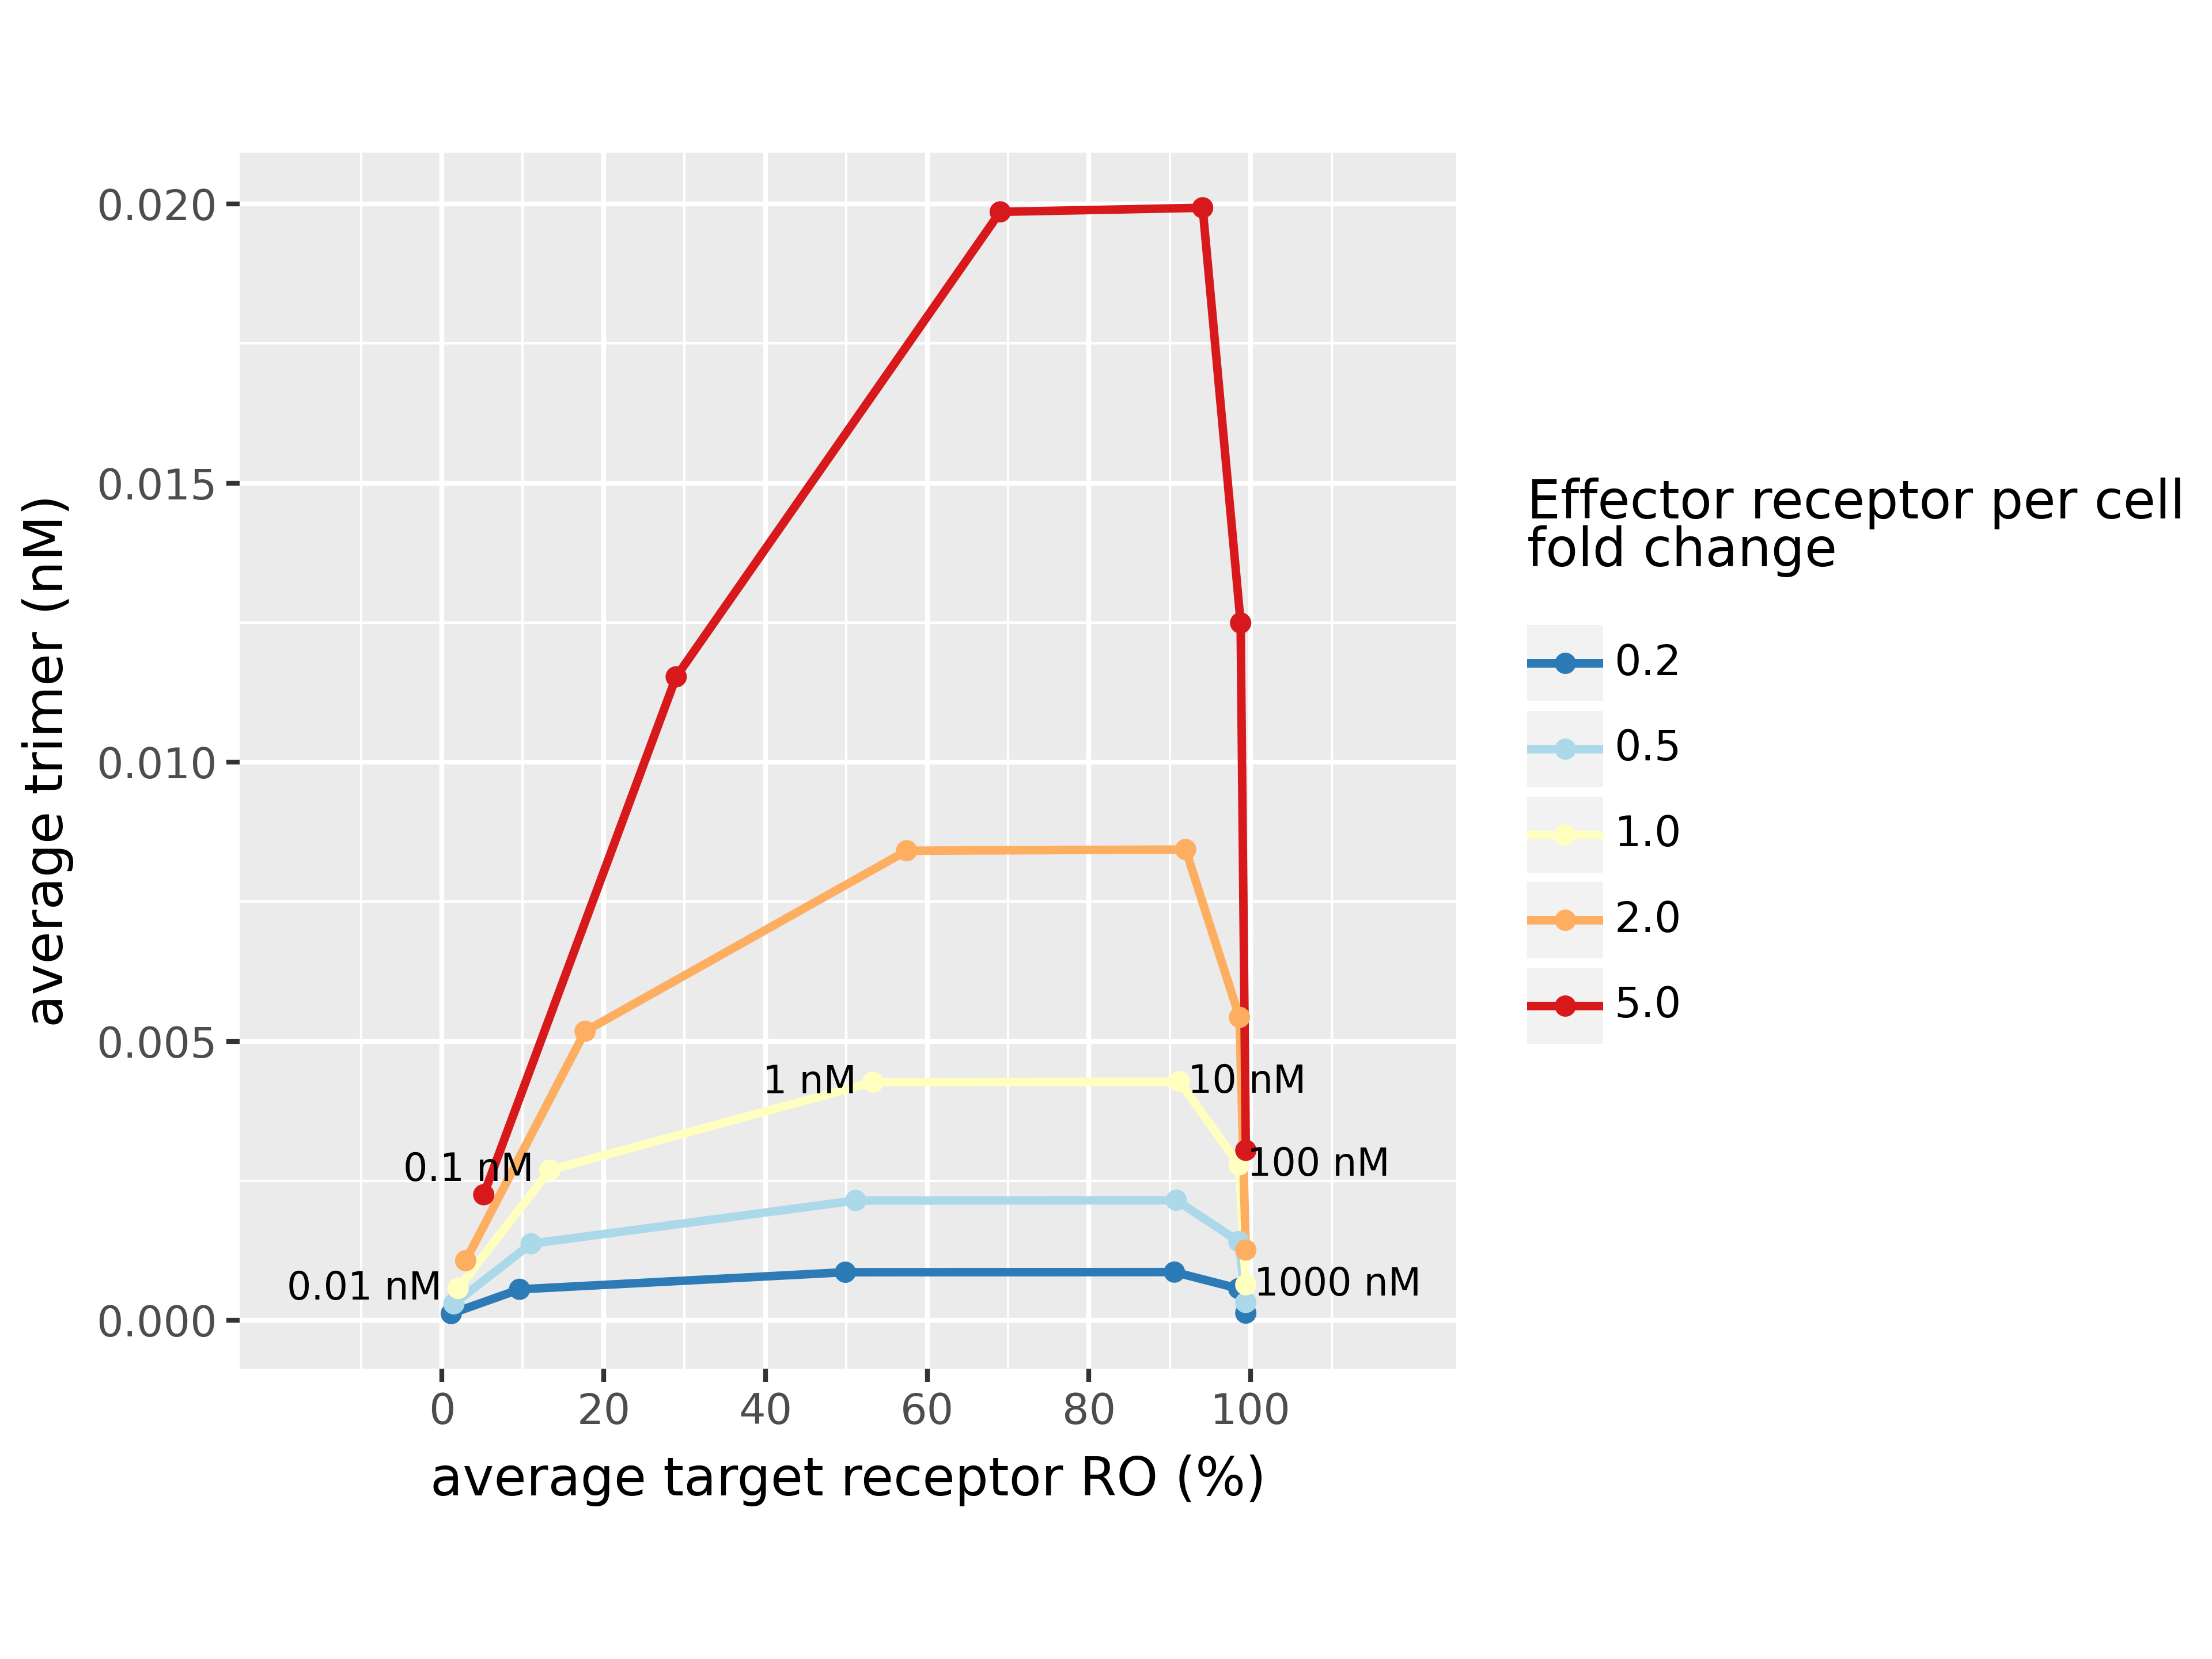

In [6]:
plot_RO_vs_trimer(Tdr, RO_var = 'targetRO_avg_percent', RO_label = 'average target receptor RO (%)',
                 trimer_var = 'trimer_avg_nM', trimer_label = 'average trimer (nM)')

## Plot trough target receptor RO versus trimer

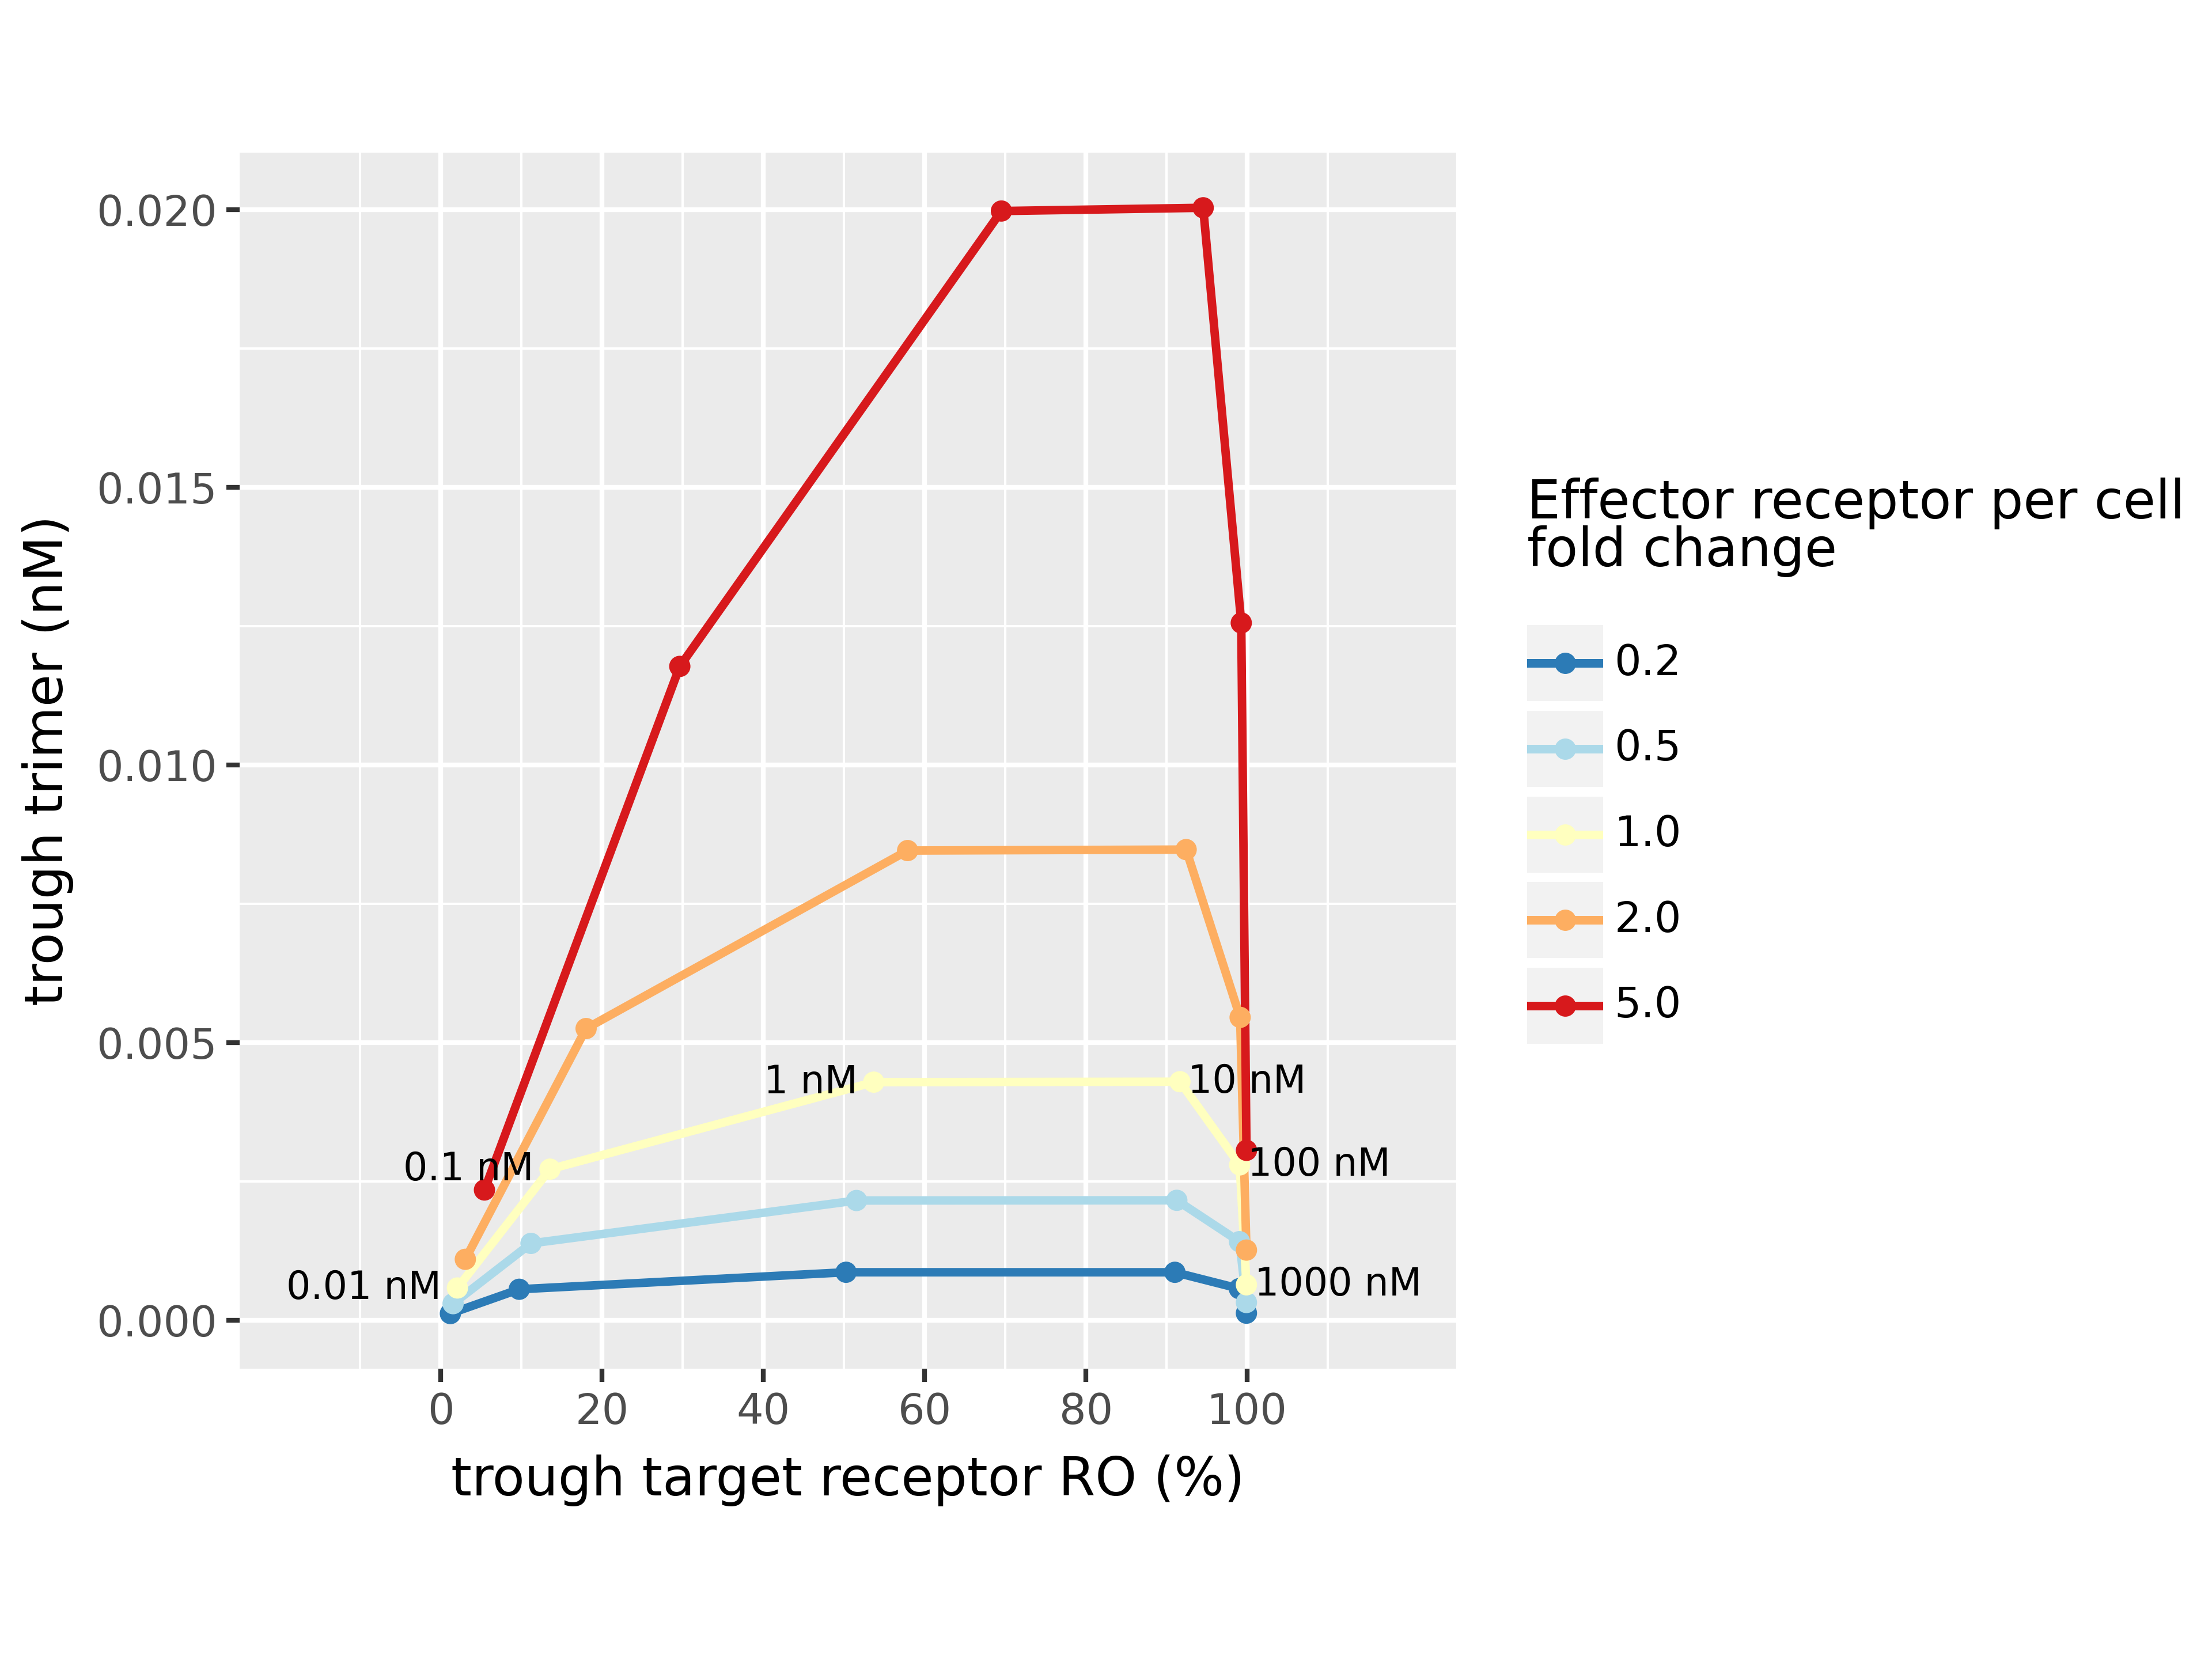

In [7]:
plot_RO_vs_trimer(Tdr, RO_var = 'targetRO_trough_percent', RO_label = 'trough target receptor RO (%)',
                 trimer_var = 'trimer_trough_nM', trimer_label = 'trough trimer (nM)')